In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def predict(w: np.ndarray, X: np.ndarray):
    """
    Input:
        w: wieght vector (d + 1): np.ndarray
        x: input features (n, d): np.ndarray
    Output:
        y: output (n): np.ndarray
    """
    x = np.pad(X, pad_width = ((0, 0), (0, 1)), constant_values=1)
    raw = np.dot(x, w.T).T
    return 1 / (1 + np.exp(-1*raw)) # apply sigmoid function to bound p to [0, 1] 

In [169]:
def binary_cross_entropy(w, X, Y):
    """
    Input:
        w: wieght vector (d + 1): np.ndarray
        X: list of n samples (n, d): np.ndarray
        Y: list of n results (n): np.ndarray
    Output:
        cross entropy loss: float
    """
    predicted = predict(w, X)
    n, d = X.shape
    loss = (-1/n) * np.sum((Y * np.log(predicted+.000001)) + ((np.ones(n)-Y) * np.log(1-predicted+.000001)))
    return loss


In [170]:
#test binary cross entropy

w = np.array([0.0, 0.0])
X = np.array([[1], [2], [3]])
Y = np.array([0, 1, 0])

np.isclose(binary_cross_entropy(w, X, Y), 0.693, atol=1e-3)

True

In [196]:
def train(train_X, train_Y, step_size=.00005, iterations=100000):
    """
    Input:
        train_X: training samples (n, d): np.ndarray
        train_Y: training labels (n): np.ndarray
    Output:
        w: wieght vector (d + 1): np.ndarray
    """
    n, d = train_X.shape
    w = np.random.rand(d + 1)
    padded_X = np.pad(train_X, pad_width = ((0, 0), (0, 1)), constant_values=1)
    for i in range(iterations):
        #learning rate scheduler
        if i == iterations/2:
            iterations = iterations/2
            step_size = step_size/5
    
        predicted = predict(w, train_X) # predict values from model
        grad = (1/n) * np.dot(predicted - train_Y, padded_X) # gradient calculation
        w = w - (grad * step_size) #gradient update
    return w
    

In [197]:

train_X = np.random.randint(-100, 100, (100, 2))
train_X[:, 1] *= 5
def on_off_set(point, a=5, b=20):
    if point[0] * a + b > point[1]:
        return 1
    return 0
    
train_Y = np.array([on_off_set(i) for i in train_X])

vals = train(train_X, train_Y)
print(vals)
print(binary_cross_entropy(vals, train_X, train_Y))

[ 0.68916575 -0.13336559  1.01064578]
0.023974882052350974


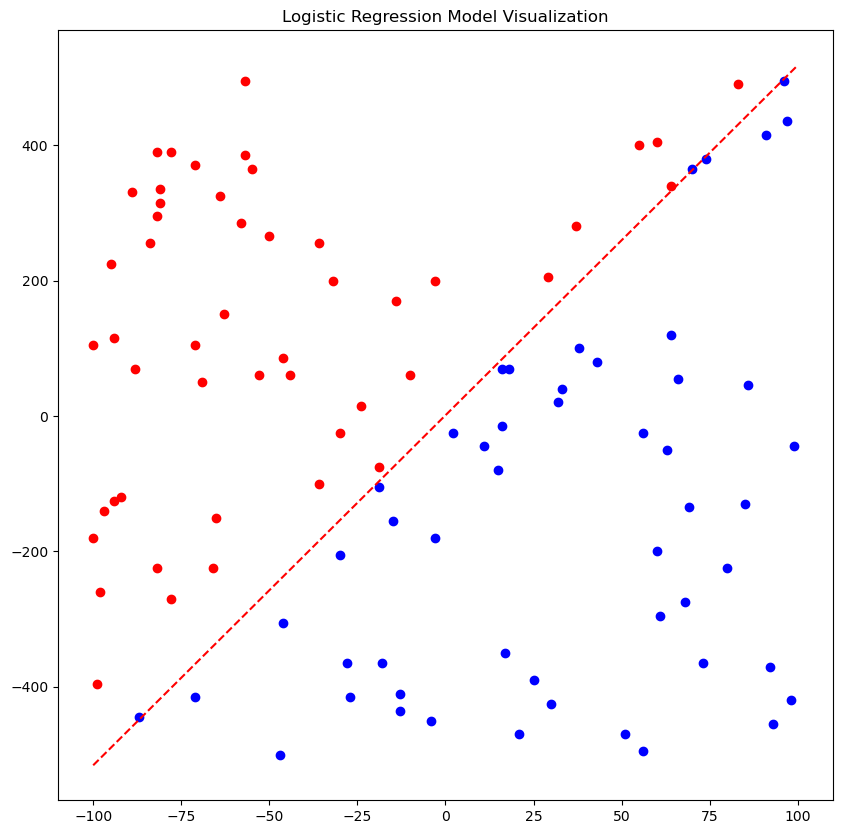

In [198]:

# Plotting data points
plt.figure(figsize=(10, 10))
plt.scatter(train_X[train_Y == 1][:, 0].T, train_X[train_Y == 1][:, 1].T, color='blue', label='Positive Class')
plt.scatter(train_X[train_Y == 0][:, 0].T, train_X[train_Y == 0][:, 1].T, color='red', label='Negative Class')

# Plotting the decision boundary: sigmoid(w*x + b) = 0.5 ⟹ w*x + b = 0
x_vals = np.linspace(-100, 100, 100)
y_vals = (-1 * vals[0]/vals[1]) * x_vals + vals[2]
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression Line')  # Model predictions


plt.title('Logistic Regression Model Visualization')
plt.show()